In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
seaborn_palettes = [
    "deep", "muted", "bright", "pastel", "dark", "colorblind",
    "Blues", "BuGn", "BuPu",
    "GnBu", "Greens", "Greys", "Oranges", "OrRd",
    "PuBu", "PuBuGn", "PuRd", "Purples", "RdPu",
    "Reds", "YlGn", "YlGnBu", "YlOrBr", "YlOrRd",
    "afmhot", "autumn", "bone", "cool",
    "copper", "gist_heat", "gray", "hot",
    "inferno", "magma", "pink", "plasma",
    "spring", "summer", "viridis", "winter", "cividis"
]

In [4]:
df = pd.read_csv("train.csv")

# Top 5 rows

In [5]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


# Data Shape

In [6]:
df.shape

(6500, 20)

# Columns in the dataset

In [7]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [8]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

- Median Price of Sculpute is 1192
- 25 % of the population is Price Of Sculpture is below 5

In [11]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [12]:
targte_feature = 'Cost'

In [13]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [14]:
print("The Number of numerical features in the dataset are {} and those are {}".format(len(numeric_features) , numeric_features))
print("The Number of Categorical features in the dataset are {} and those are {}".format(len(categorical_features) , categorical_features))

The Number of numerical features in the dataset are 7 and those are ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
The Number of Categorical features in the dataset are 13 and those are ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


# Univariate Analysis

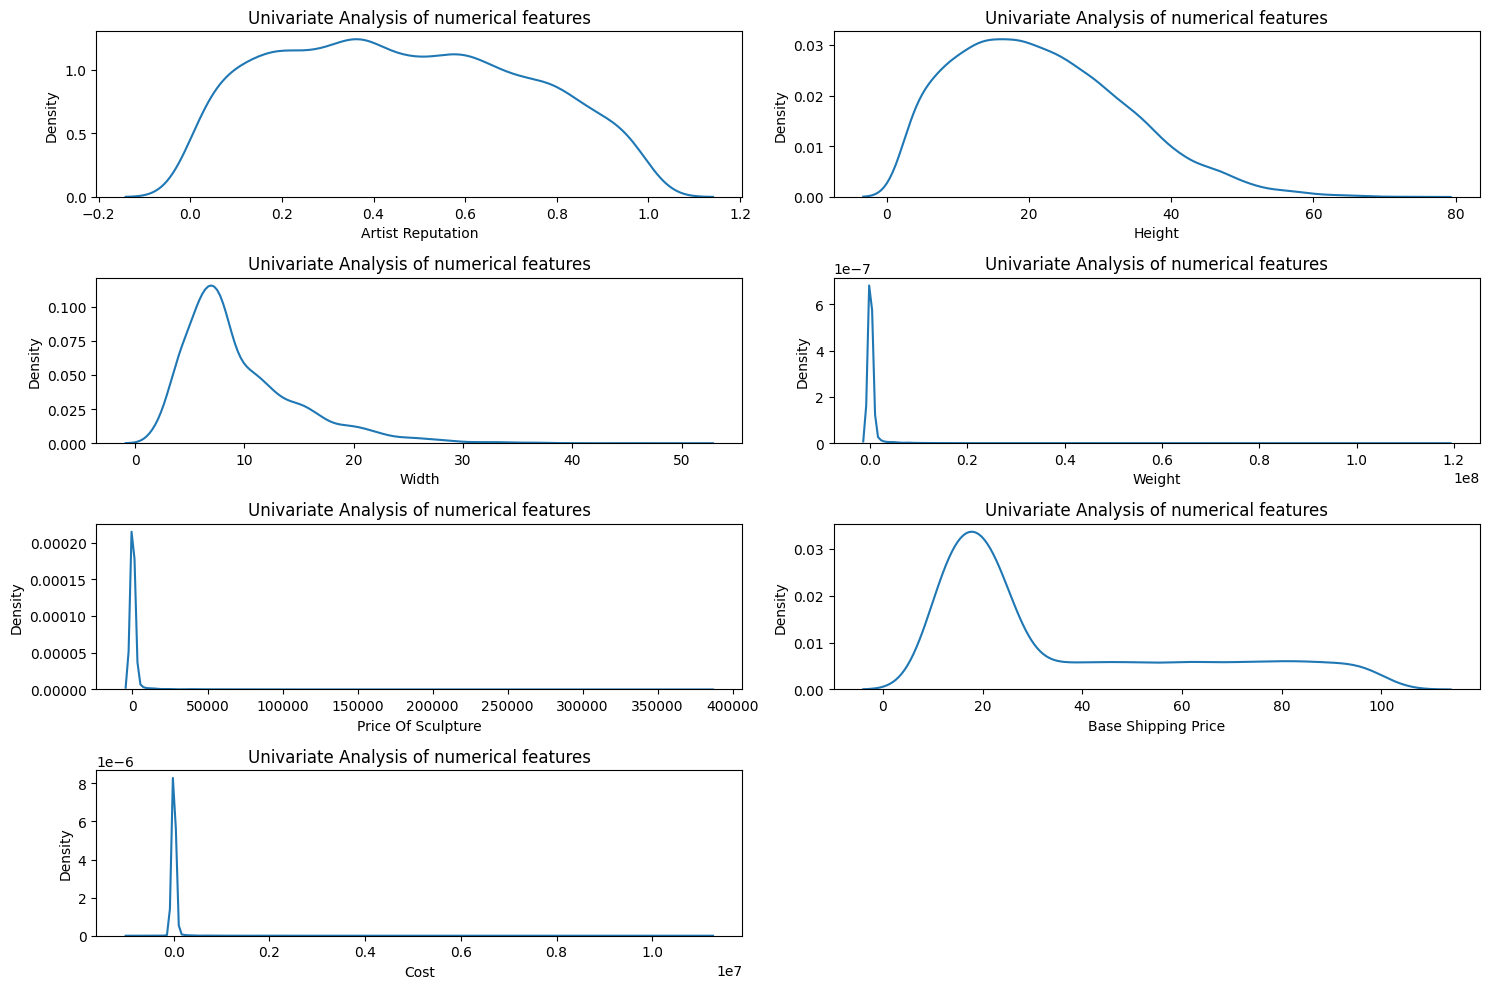

In [15]:
plt.figure(figsize=(15 , 10))

for i in range(len(numeric_features)):
    plt.subplot(4 , 2 , i+1)
    palette = str(random.choice(seaborn_palettes))
    palette_name = random.choice(seaborn_palettes)
    palette = sns.color_palette(palette_name)
    color = random.choice(palette)
    sns.kdeplot(x  = numeric_features[i] , data = df , palette = palette)
    plt.xlabel(numeric_features[i])
    plt.title('Univariate Analysis of numerical features')
    plt.tight_layout()

In [16]:
categorical_columns =[]
for i in categorical_features:
    print(f"The categorical feature {i} has {len(df[i].unique())}")
    if len(df[i].unique()) < 10 :
        categorical_columns.append(i)

The categorical feature Customer Id has 6500
The categorical feature Artist Name has 6449
The categorical feature Material has 8
The categorical feature International has 2
The categorical feature Express Shipment has 2
The categorical feature Installation Included has 2
The categorical feature Transport has 4
The categorical feature Fragile has 2
The categorical feature Customer Information has 2
The categorical feature Remote Location has 3
The categorical feature Scheduled Date has 1660
The categorical feature Delivery Date has 1664
The categorical feature Customer Location has 6500


In [17]:
print(f"The categorical column which have less that 10 unique values are {len(categorical_columns)} and those are {categorical_columns}")

The categorical column which have less that 10 unique values are 8 and those are ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location']


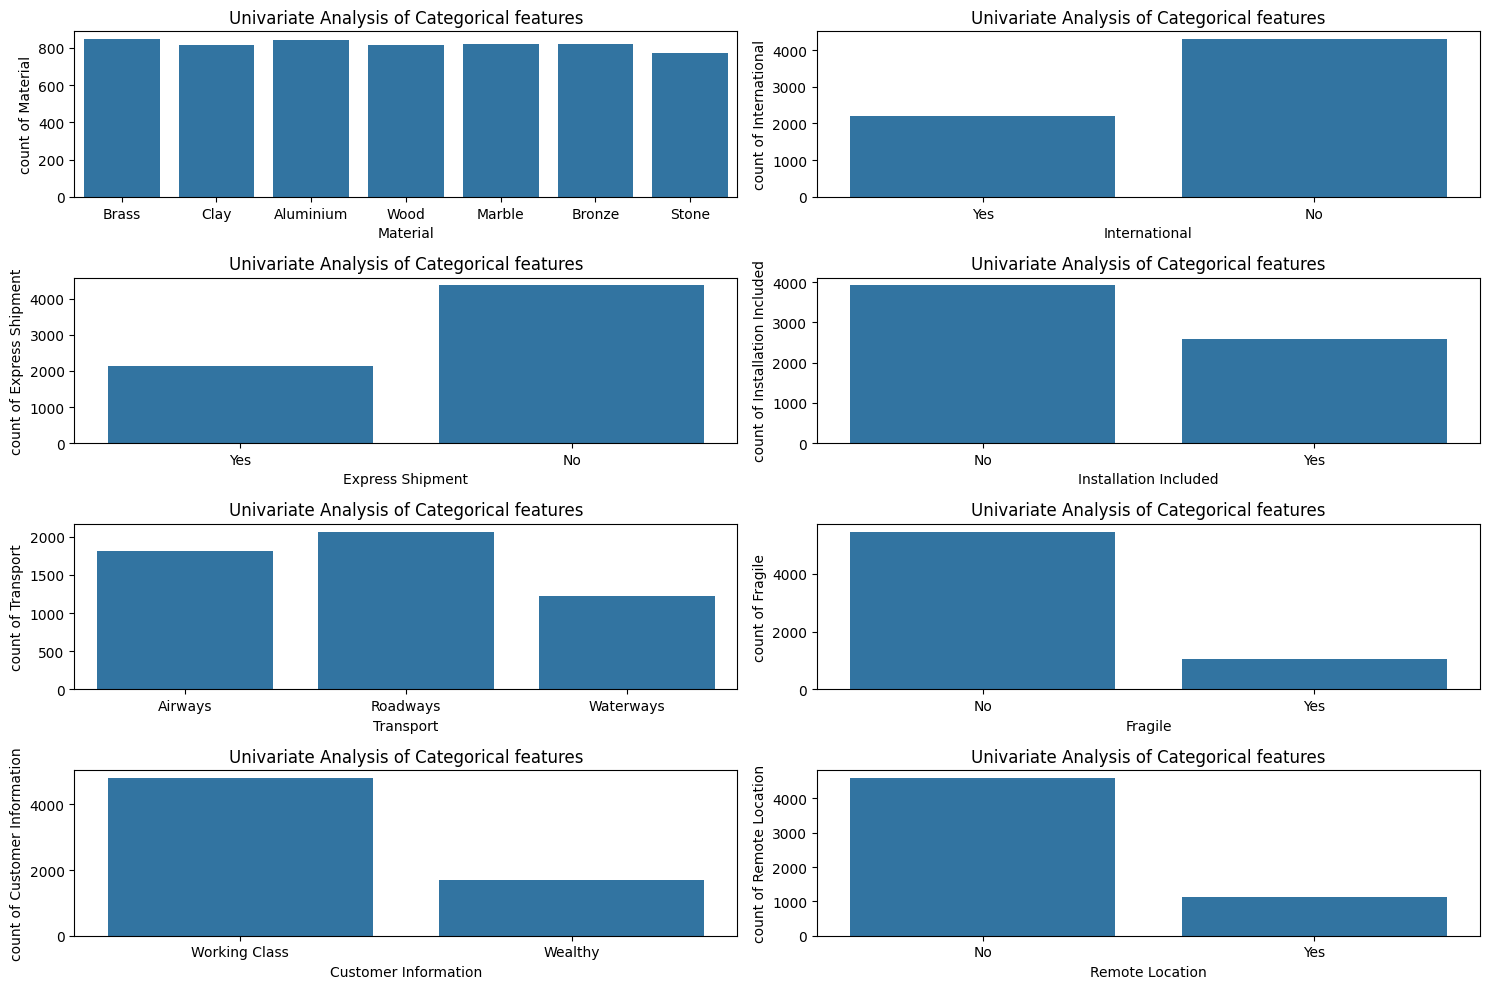

In [18]:
plt.figure(figsize=(15,10))
for i in range(len(categorical_columns)):
    plt.subplot(4 , 2 , i+1)
    sns.countplot(x = categorical_columns[i] , data = df)
    plt.xlabel(categorical_columns[i])
    plt.ylabel(f'count of {categorical_columns[i]}')
    plt.title('Univariate Analysis of Categorical features')
    plt.tight_layout()

# Checking for missing values

In [19]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

# Correlation b/w numerical columns

In [20]:
df[numeric_features].corr()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


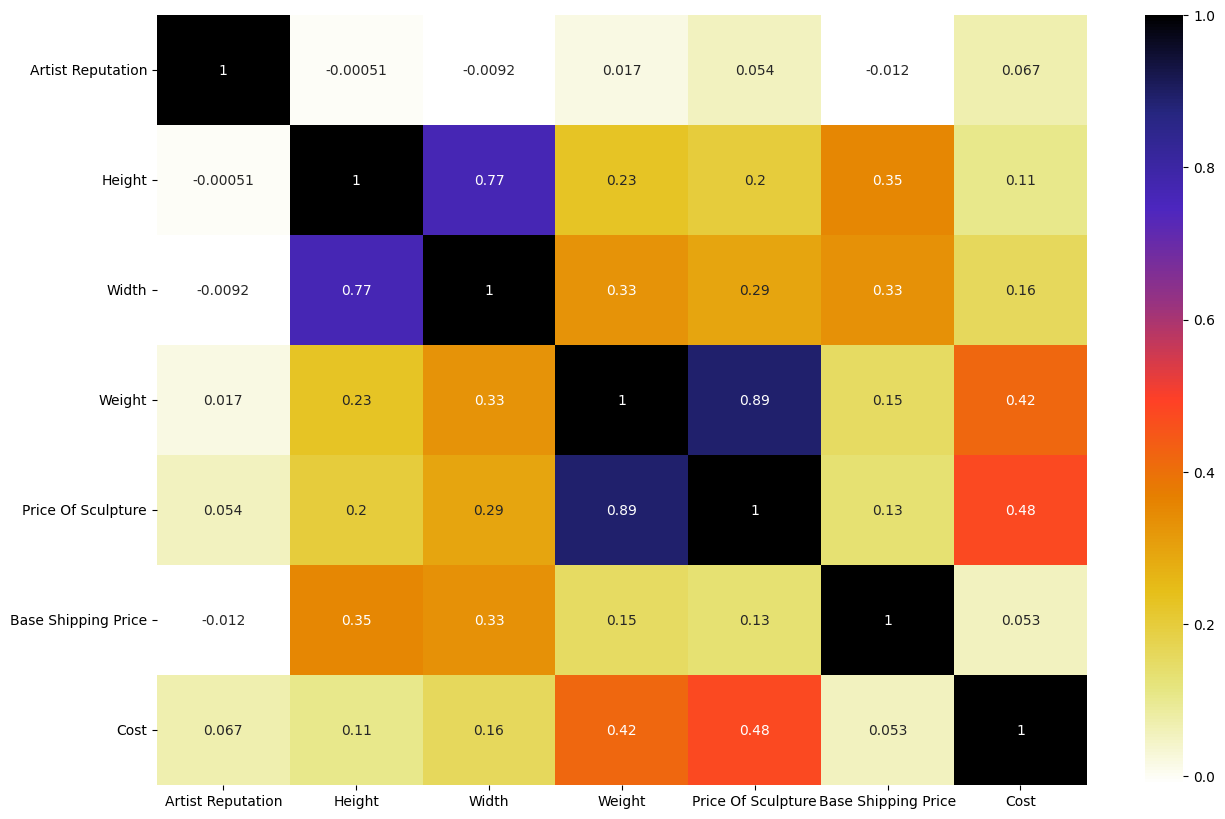

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_features].corr() , annot=True , cmap = "CMRmap_r")
plt.show()

- There is a high correlation b/w height and width and weight - Price of Sculpture

# ANOVA

In [65]:
from scipy import stats

# We need to drop NA values for the ANOVA test as it can't handle missing data
df_clean = df.dropna(subset=['Material', 'Cost'])

# Perform one-way ANOVA to test if there are significant differences between the means of 'Cost' for each 'Material'
anova_results = stats.f_oneway(*[df_clean[df_clean['Material'] == material]['Cost'] for material in df_clean['Material'].unique()])

anova_results

F_onewayResult(statistic=16.012699930259156, pvalue=2.379811288132757e-18)

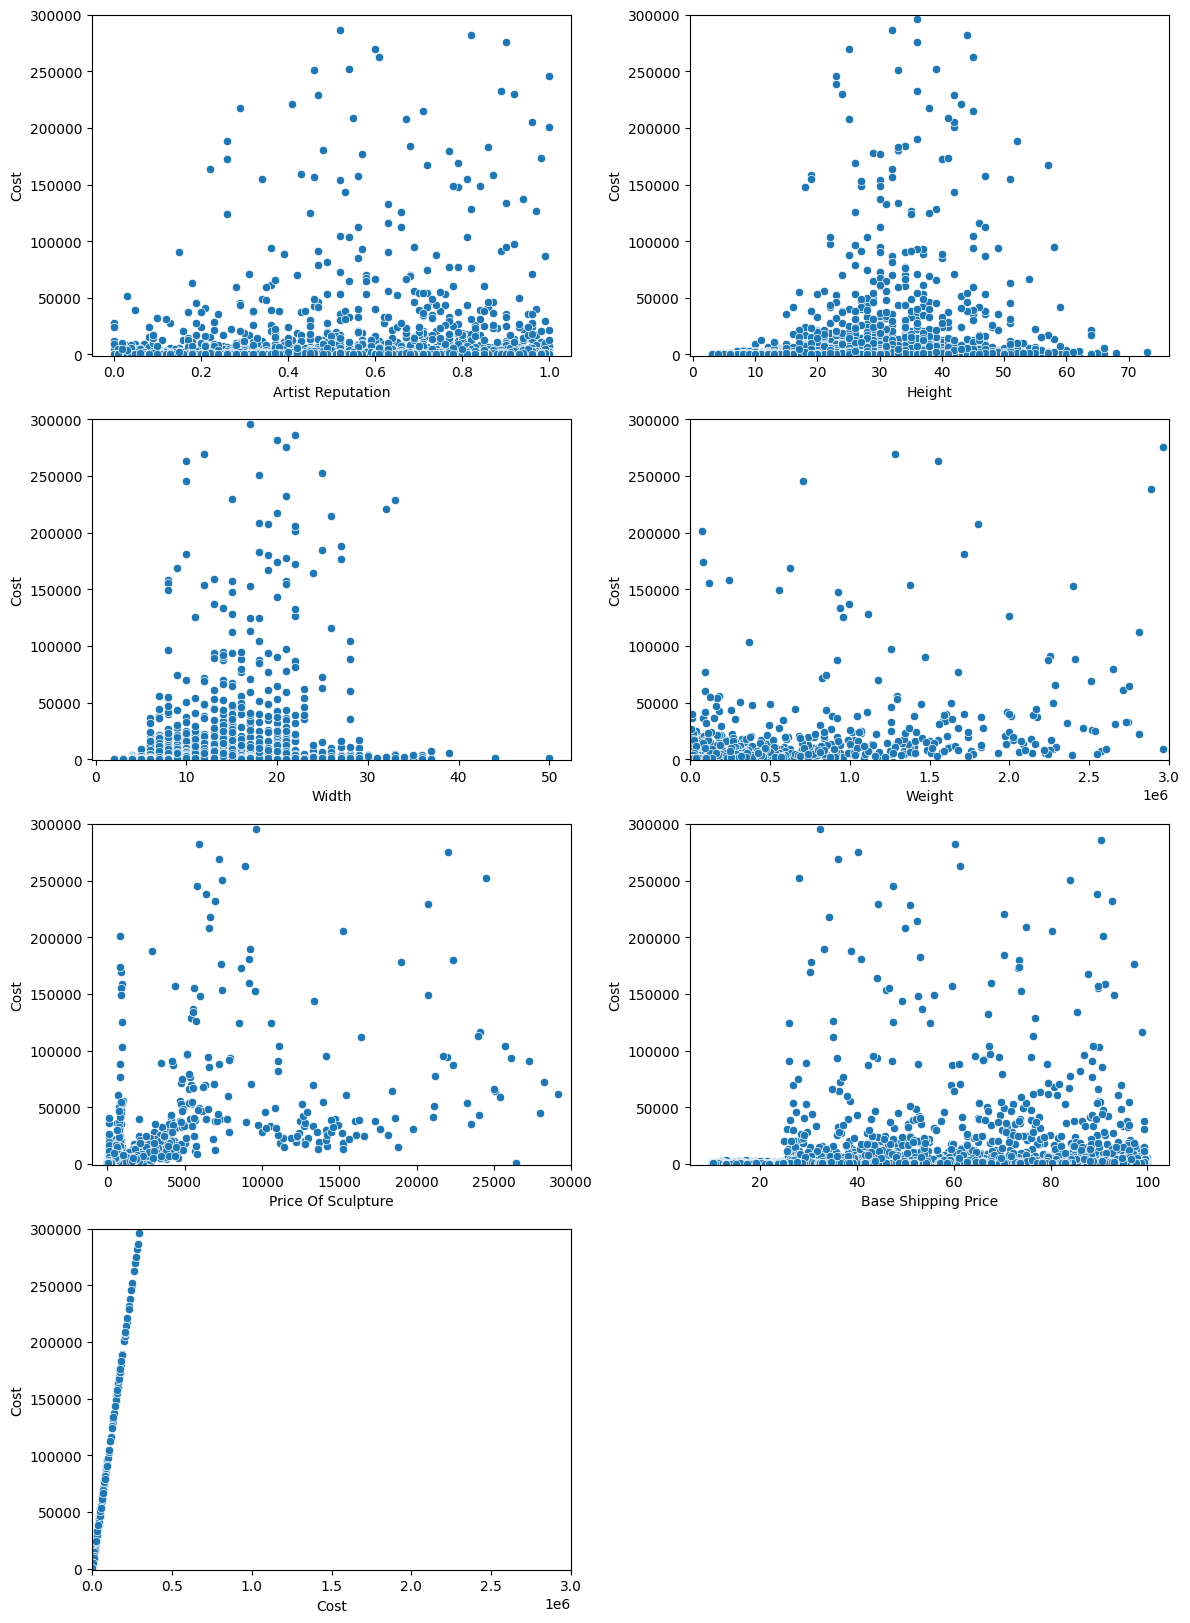

In [22]:
fig = plt.figure(figsize=(12,24))

for i in range(len(numeric_features)):
    ax = plt.subplot( 6 , 2 , i+1)
    sns.scatterplot(data = df , y = targte_feature , x = numeric_features[i])
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000 , 30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000 , 3000000)
    plt.ylim(-1000 , 300000)
    plt.tight_layout()

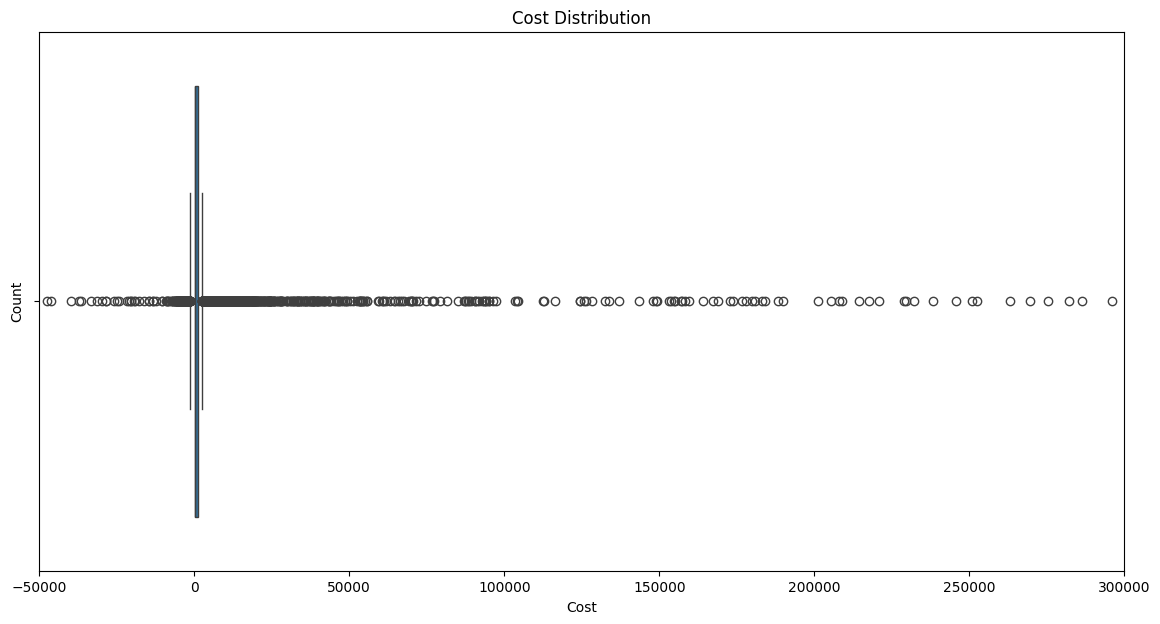

In [23]:
plt.figure(figsize=(14 , 7))
sns.boxplot(df[targte_feature] , orient='h')
plt.title("Cost Distribution")
plt.ylabel("Count")
plt.xlim(-50000 , 300000)
plt.show()

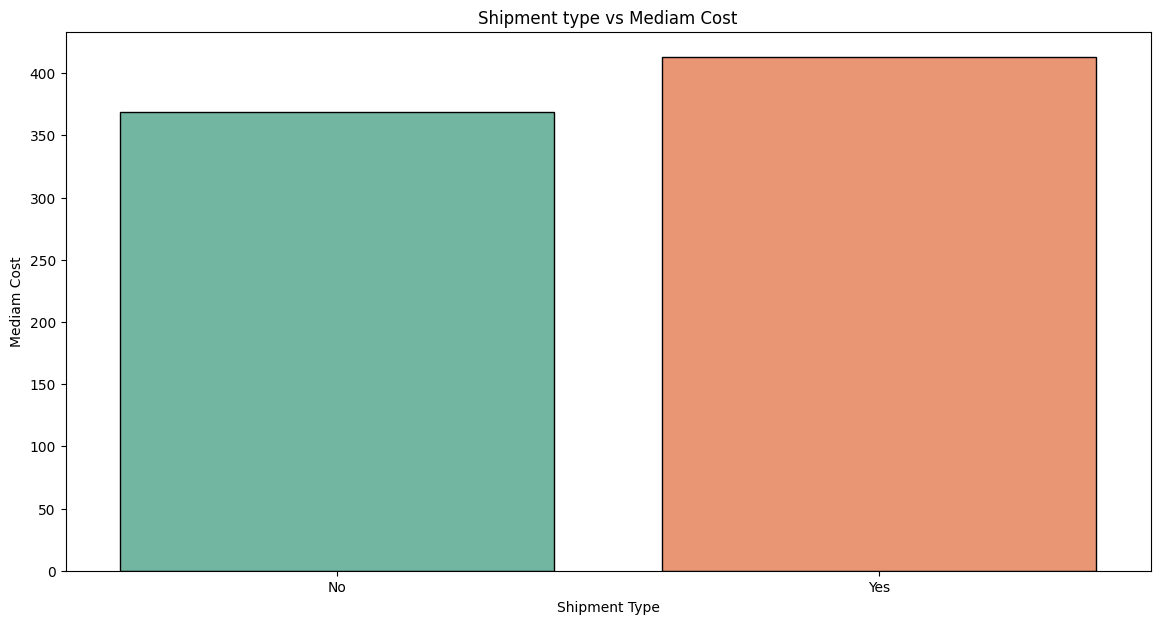

In [24]:
internation_df = df.groupby('International')[targte_feature].median()
internation_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = internation_df.index , y = internation_df.values , ec = "black" , palette = "Set2")
plt.title("Shipment type vs Mediam Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Shipment Type")
plt.show()

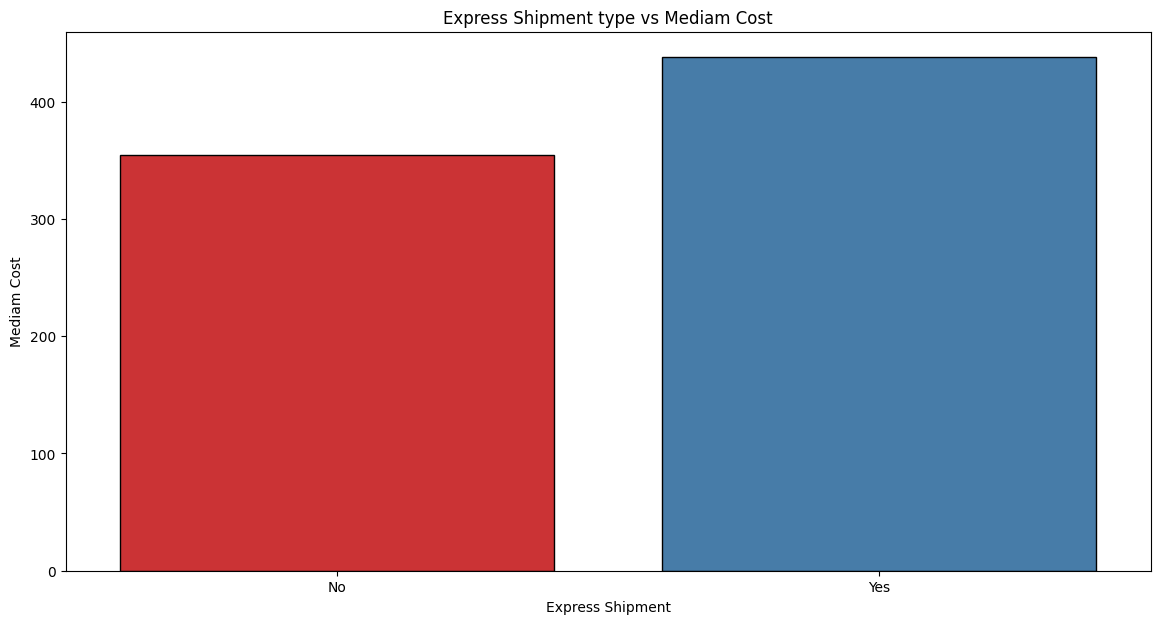

In [25]:
express_df = df.groupby('Express Shipment')[targte_feature].median()
express_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = express_df.index , y = express_df.values , ec = "black" , palette = "Set1")
plt.title("Express Shipment type vs Mediam Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Express Shipment")
plt.show()

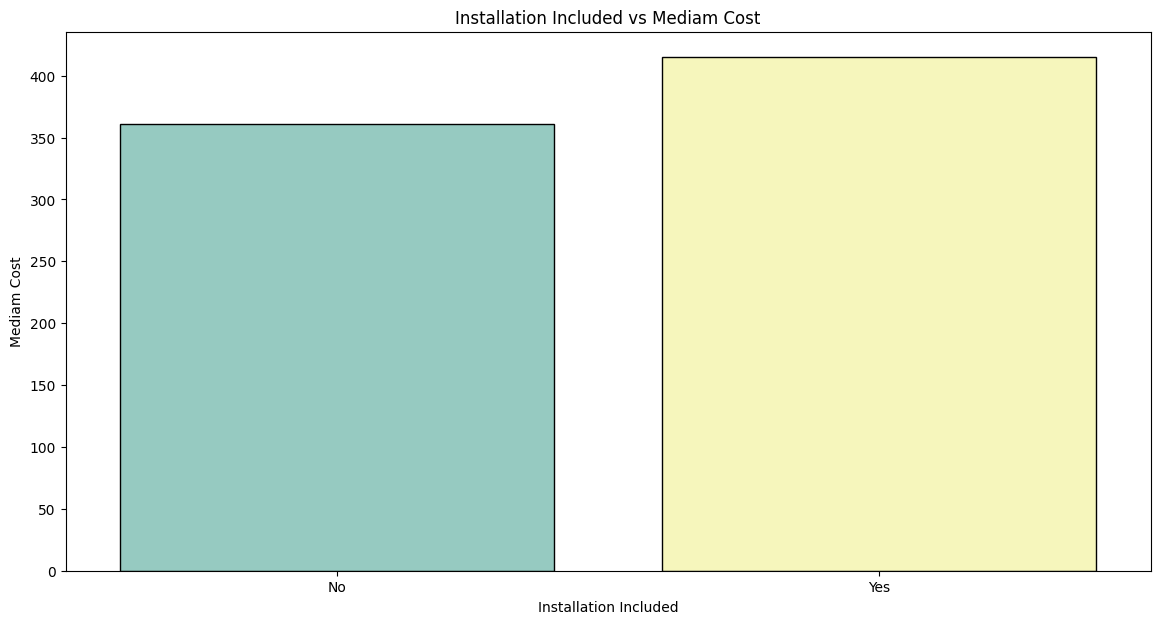

In [26]:
installation_df = df.groupby('Installation Included')[targte_feature].median()
installation_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = installation_df.index , y = installation_df.values , ec = "black" , palette = "Set3")
plt.title("Installation Included vs median Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Installation Included")
plt.show()

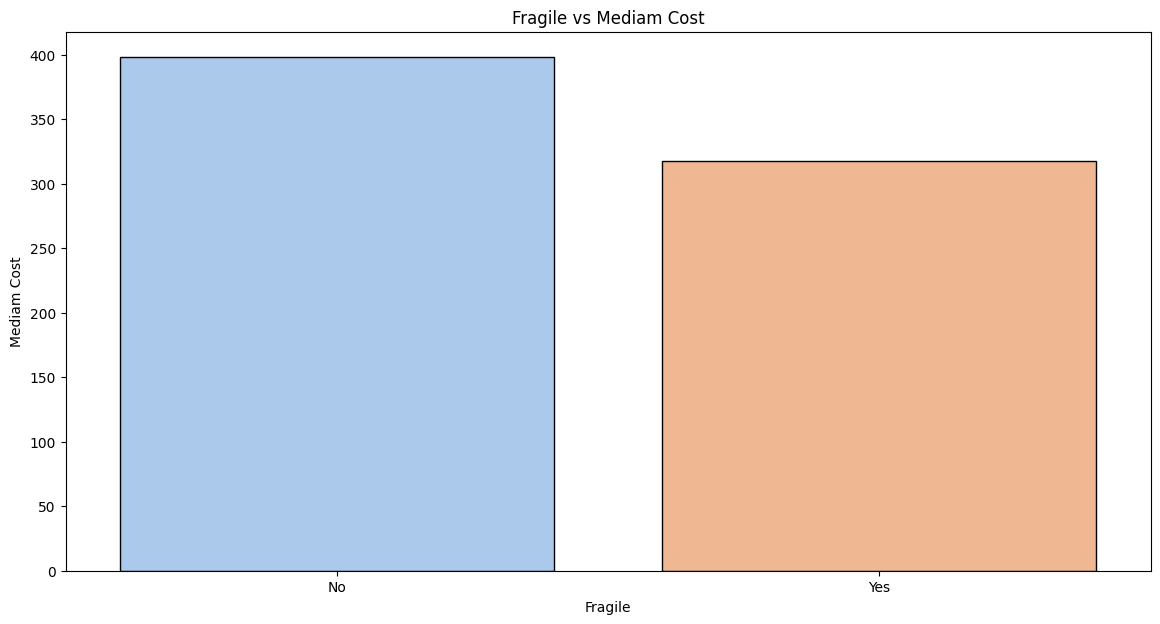

In [27]:
fragile_df = df.groupby('Fragile')[targte_feature].median()
fragile_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = fragile_df.index , y = fragile_df.values , ec = "black" , palette = "pastel")
plt.title("Fragile vs Mediam Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Fragile")
plt.show()

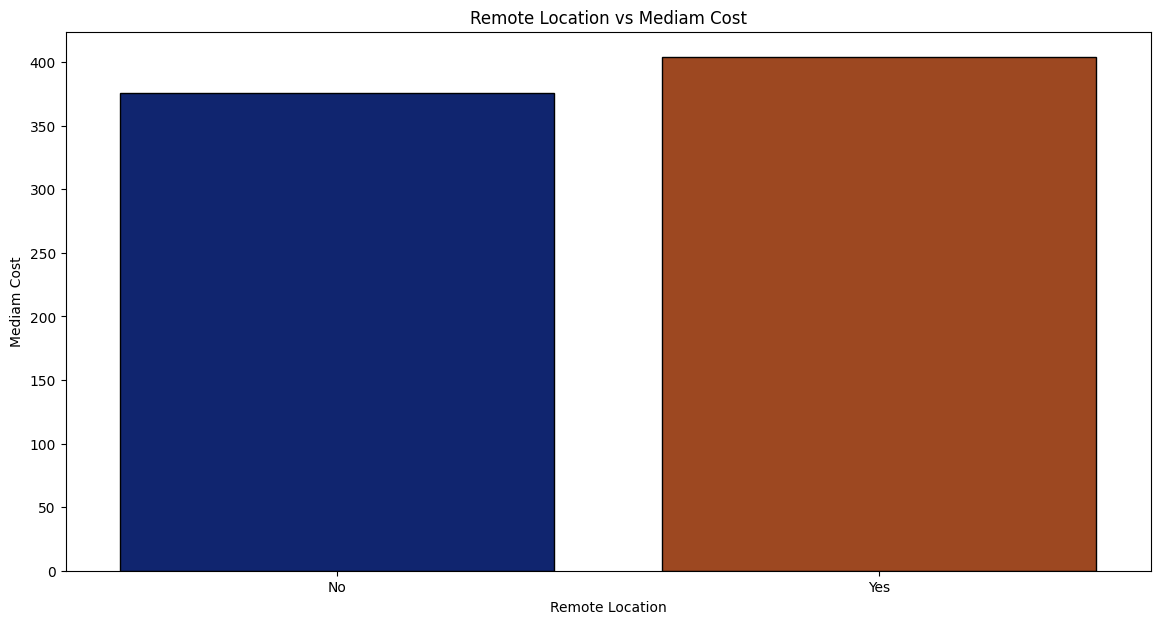

In [28]:
remote_df = df.groupby('Remote Location')[targte_feature].median()
remote_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = remote_df.index , y = remote_df.values , ec = "black" , palette = "dark")
plt.title("Remote Location vs Median Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Remote Location")
plt.show()

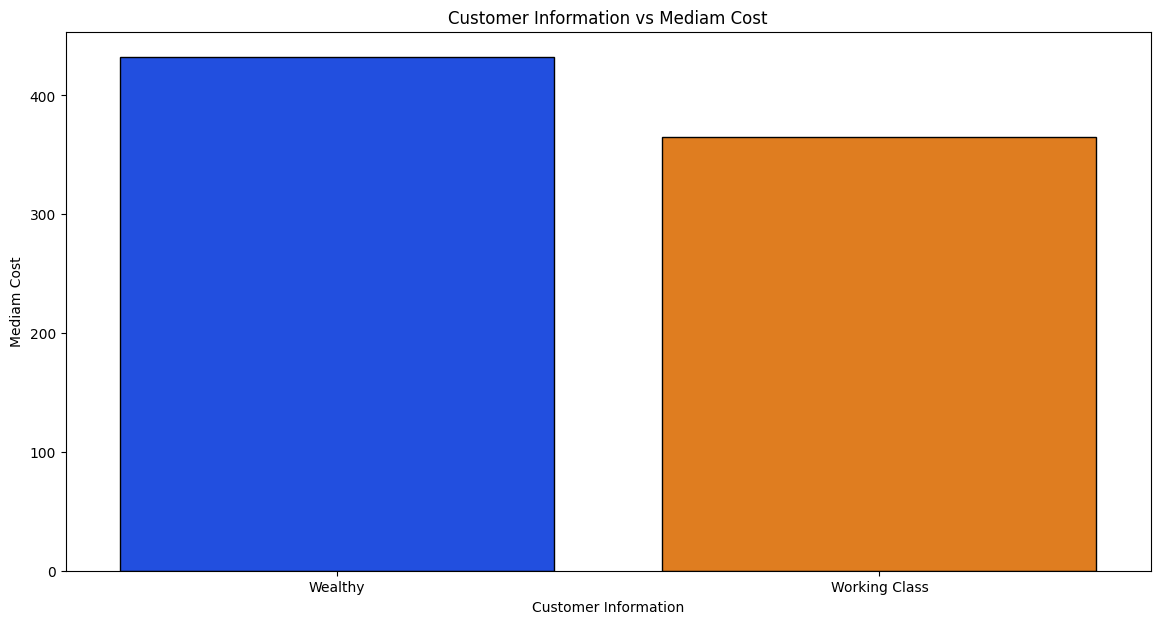

In [67]:
customer_df = df.groupby('Customer Information')[targte_feature].median()
customer_df.to_frame()

plt.figure(figsize=(14 , 7))
sns.barplot( x = customer_df.index , y = customer_df.values , ec = "black" , palette = "bright")
plt.title("Customer Information vs Median Cost")
plt.ylabel("Mediam Cost")
plt.xlabel("Customer Information")
plt.show()

In [30]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [31]:
df["year"] = df['Scheduled Date'].dt.year
df["month"] = df["Scheduled Date"].dt.month

In [32]:
year_month_df = df.groupby(["year" , "month"])["Cost"].median()
year_month_df = year_month_df.unstack().T

In [33]:
year_month_df.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,337.92,376.300,363.180,302.735,411.200
2,366.19,389.255,376.790,427.450,361.845
3,474.51,401.170,307.720,508.750,309.360
4,326.55,460.570,473.685,422.450,408.290
5,450.61,477.870,354.090,346.330,419.210


In [34]:
year_month_df[2015]

month
1     337.920
2     366.190
3     474.510
4     326.550
5     450.610
6     298.230
7     351.620
8     344.470
9     434.570
10    375.850
11    393.655
12    497.325
Name: 2015, dtype: float64

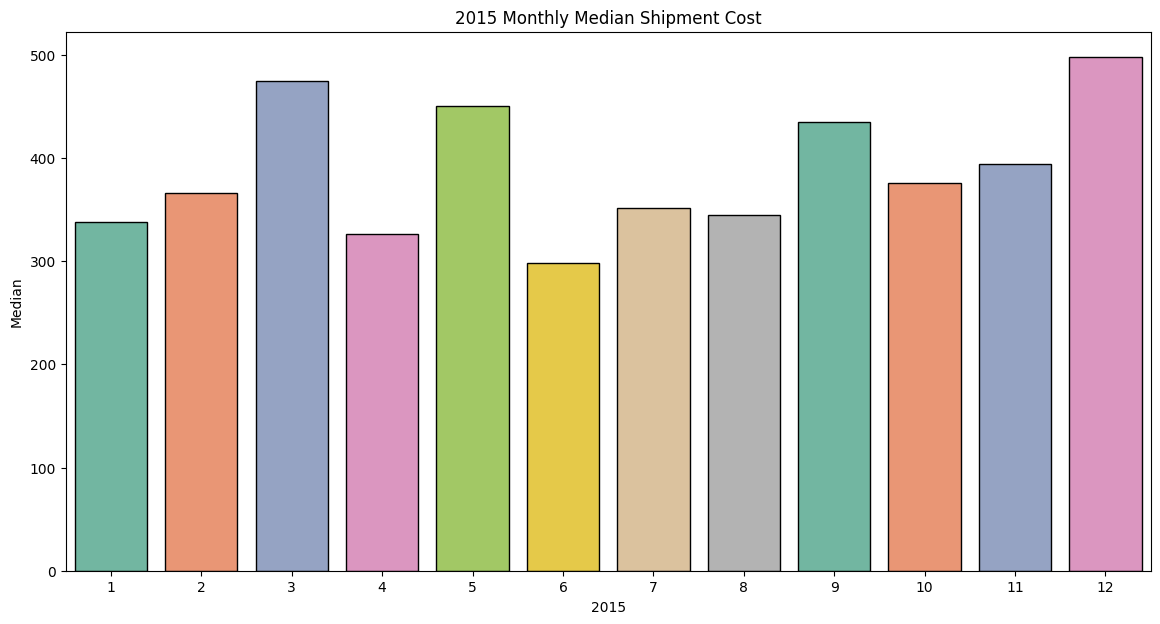

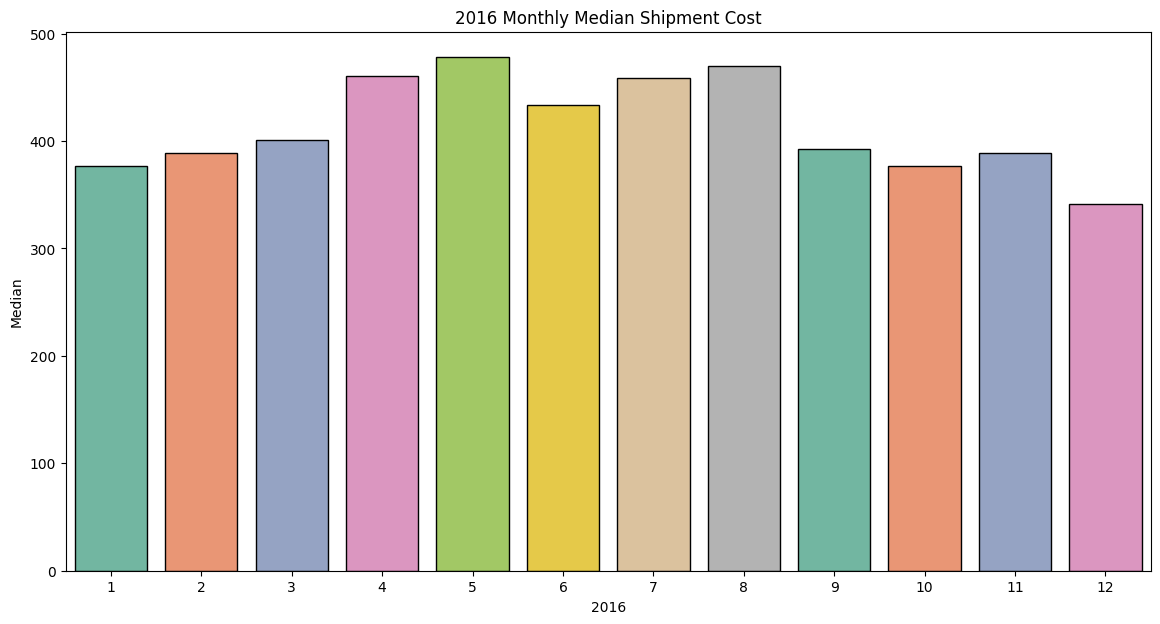

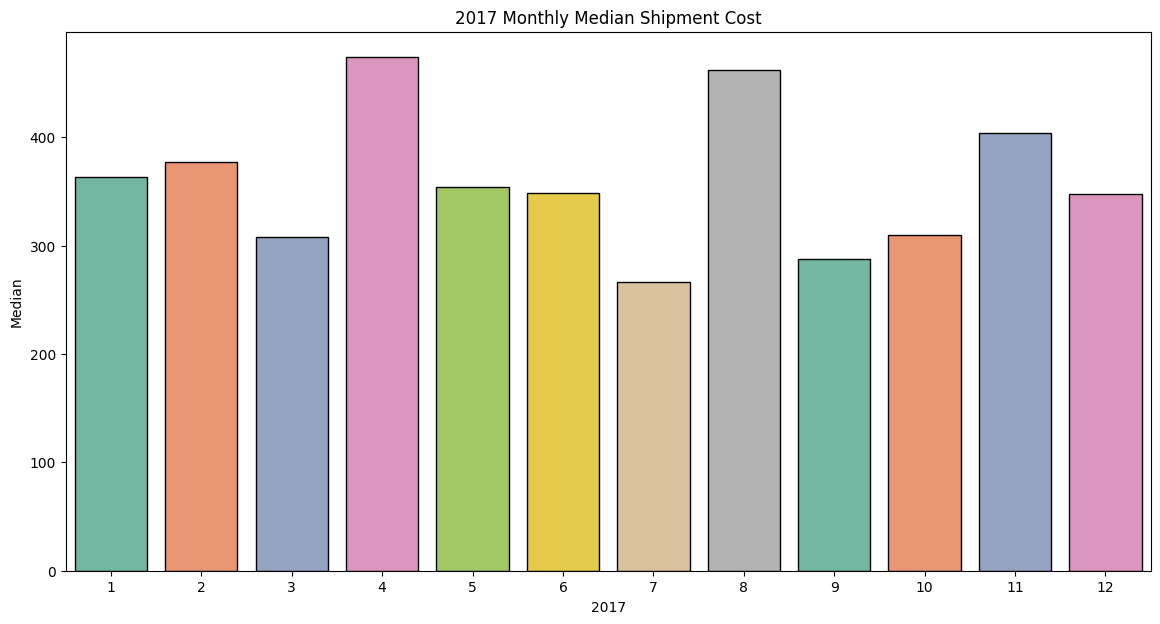

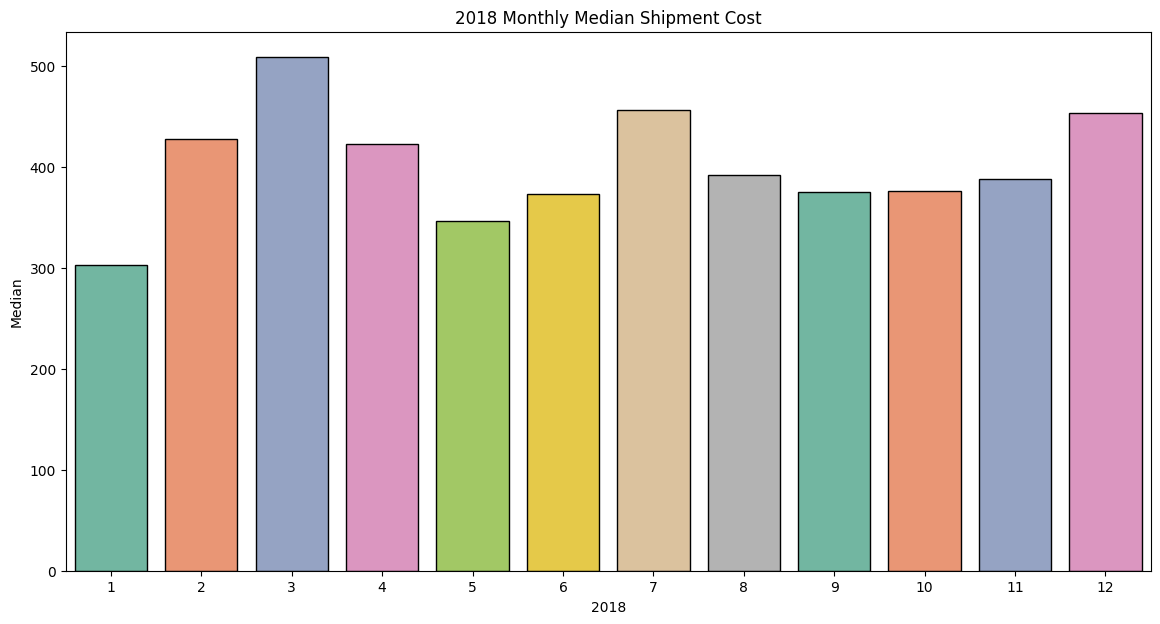

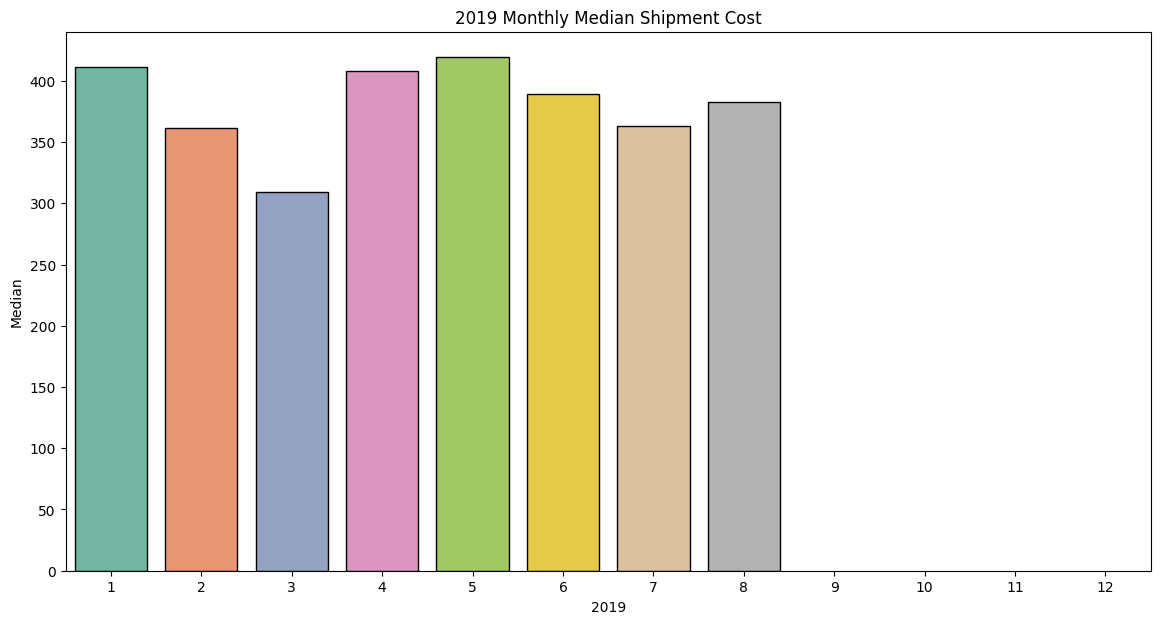

In [35]:
for i in year_month_df.columns:
    plt.figure(figsize=(14 , 7))
    sns.barplot( y = year_month_df[i] , x = year_month_df.index , ec = 'black' , palette="Set2")
    plt.title(str(i) + " Monthly Median Shipment Cost")
    plt.xlabel(i)
    plt.ylabel("Median")
    plt.show()

# Data PreProcessing

In [36]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >=1]

for i in features_with_na:
    print(i , np.round(df[i].isnull().mean()*100,5), '% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


In [37]:
numeric_features.remove(targte_feature)

In [38]:
df1 = df.copy()
for i in numeric_features:
    df1[i].fillna(df1[i].median() , inplace = True)

In [39]:
df1[numeric_features].isnull().sum()

Artist Reputation      0
Height                 0
Width                  0
Weight                 0
Price Of Sculpture     0
Base Shipping Price    0
dtype: int64

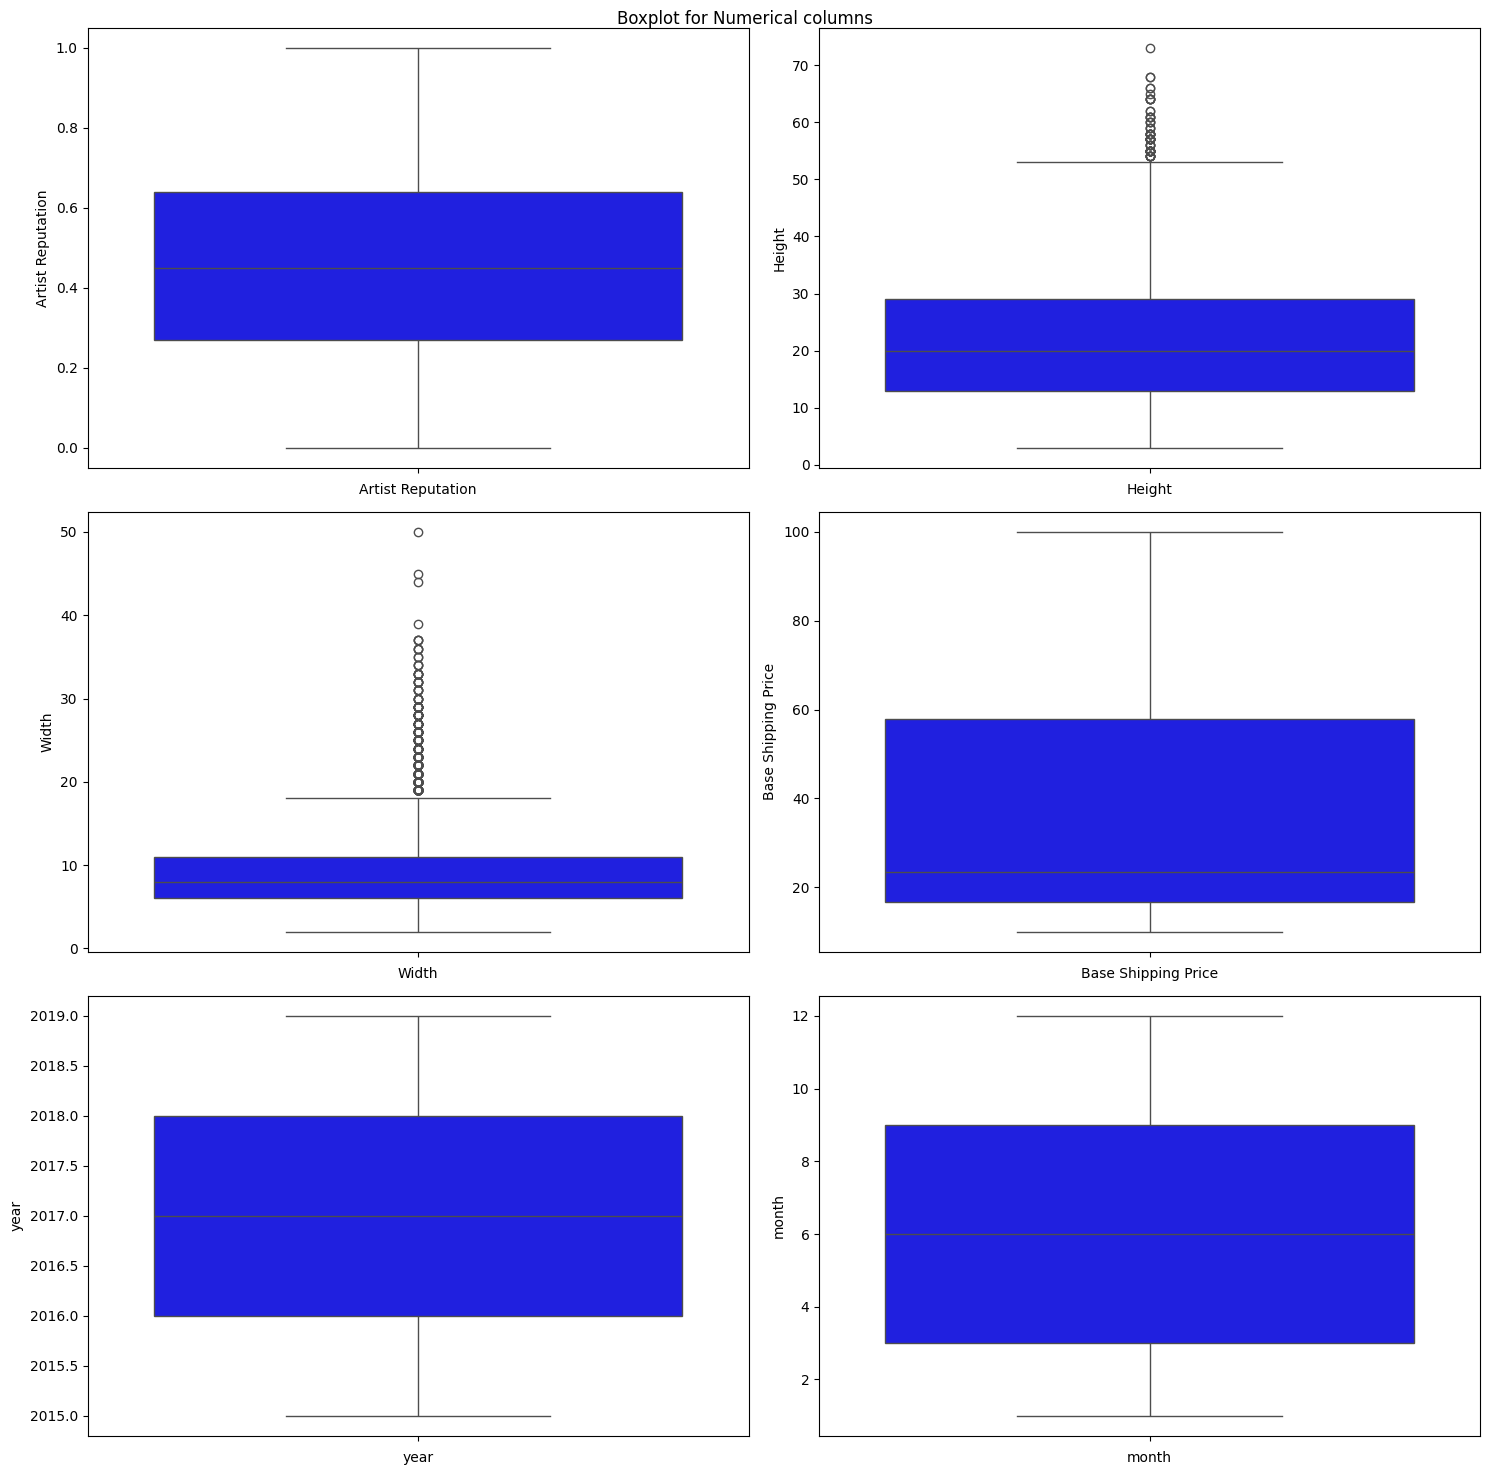

In [71]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Boxplot for Numerical columns")
for i in range(len(numeric_features)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df1[numeric_features[i]] , color = 'b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

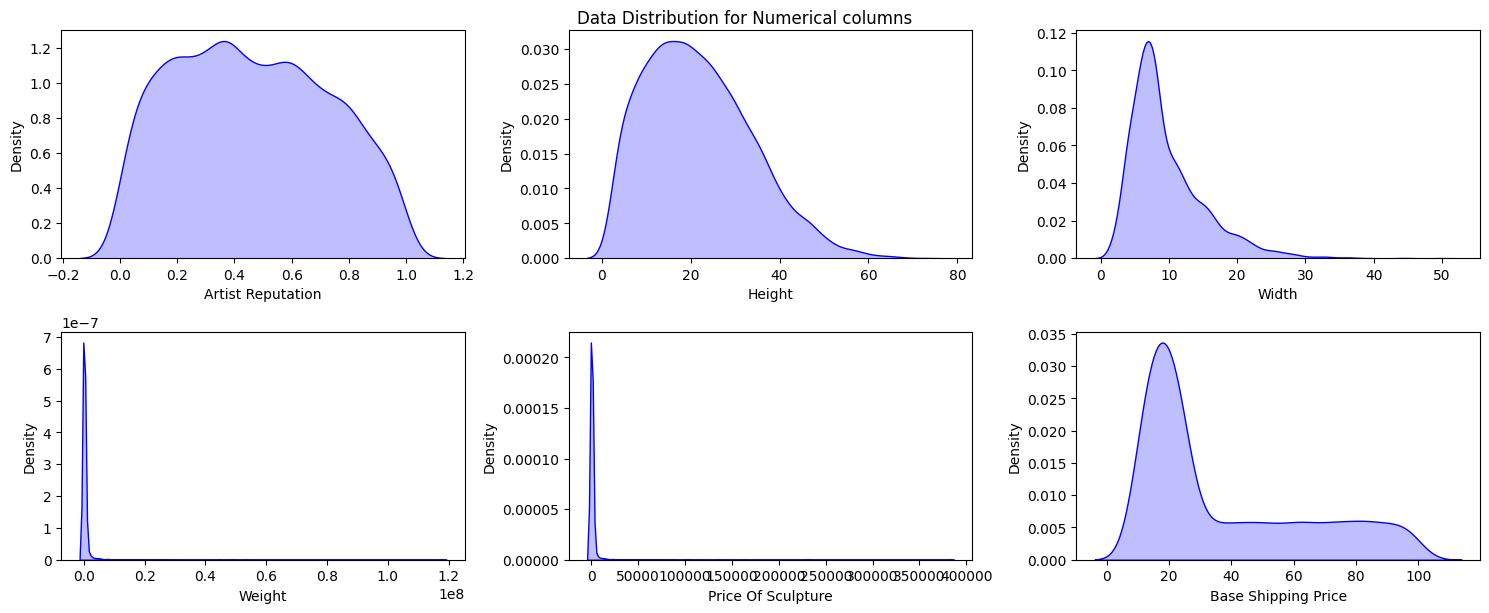

In [41]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Data Distribution for Numerical columns")

for i in range(0 , len(numeric_features)):
    plt.subplot( 5 , 3 , i+1)
    sns.kdeplot(x =df[numeric_features[i]] , shade = True , color = 'b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

- from teh above Distribution we can see that some column are extermely +ve skewed

In [42]:
outlier_feature = ["Price Of Sculpture" , "Weight"]
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)

outlier_data = df1[outlier_feature]

df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])

df_outlier = pd.DataFrame(outlier_data , columns=outlier_feature)

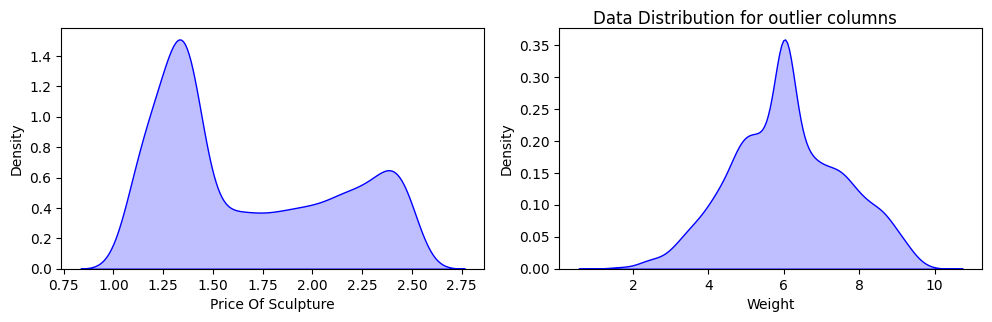

In [43]:
plt.figure(figsize=(15 , 15))
plt.suptitle("Data Distribution for outlier columns")

for i in range(0 , len(outlier_feature)):
    plt.subplot( 5 , 3 , i+1)
    sns.kdeplot(x =df1[outlier_feature[i]] , shade = True , color = 'b')
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()

In [44]:
to_drop_columns = ['Customer Id' , 'Artist Name' , 'Customer Location' , 'Scheduled Date', 'Delivery Date']
df.drop(to_drop_columns , inplace=True , axis = 1)

# Model Bulding

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [48]:
x = df.drop(columns= 'Cost' , axis = 1)
y = np.log1p(np.abs(df['Cost']))

In [49]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 42)

In [50]:
numeric_features = [i for i in x_train.columns if i not in outlier_feature and x_train[i].dtype != 'O']
categorical_features = [i for i in x_train.columns if i not in to_drop_columns and x_train[i].dtype == 'O']

In [51]:
(numeric_features) , (categorical_features) , (outlier_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'year',
  'month'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

In [52]:
numeric_transformation = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('Scaler' , RobustScaler())])

categorical_transfromation = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())])
Outliers_transformation = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy='median')),
    ('tramsformer' , PowerTransformer(standardize=True))])

preprocessor = ColumnTransformer([
    ["Numerical Pipeline" , numeric_transformation , numeric_features],
    ["Catogorical Pipeline" , categorical_transfromation , categorical_features],
    ["Outliers Features Pipiline" , Outliers_transformation , outlier_feature]])

In [53]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_metrics(true_label, predicted_label):
    mae = mean_absolute_error(true_label, predicted_label)
    mse = mean_squared_error(true_label, predicted_label)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(true_label, predicted_label)

    return mae, mse, rmse, r2

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False, max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}

In [56]:
def model_evaluation(x_train , x_test , y_train , y_test, models):
    model_list = []
    r2_list = []

    for i in range(len(models)):
        model = list(models.values())[i]

        # training the model
        model.fit(x_train , y_train)

        y_train_prediction = model.predict(x_train)
        y_test_prediction = model.predict(x_test)


        train_mae, train_mse, train_rmse, train_r2 = evaluate_regression_metrics(y_train , y_train_prediction)

        test_mae, test_mse, test_rmse, test_r2 = evaluate_regression_metrics(y_test , y_test_prediction)

        print(list(models.keys())[i])

        model_list.append(list(models.keys())[i])

        print("Model Performance on training data : ")
        print("MAE Score: ", train_mae)
        print("MSE Score: ", train_mse)
        print("RMSE Score: ", train_rmse)
        print("R2 Score: ", train_r2)

        print("-"*35)

        print("Model Performance on testing data : ")
        print("MAE Score: ", test_mae)
        print("MSE Score: ", test_mse)
        print("RMSE Score: ", test_rmse)
        print("R2 Score: ", test_r2)
        r2_list.append(test_r2)

        print("="*35)
        print("\n")

    performance_report = pd.DataFrame(list(zip(model_list , r2_list)) ,columns=['Model Name', 'R2']).sort_values(by=['R2'], ascending=False)

    return performance_report

In [57]:
performance_report = model_evaluation(x_train , x_test , y_train , y_test, models)

Linear Regression
Model Performance on training data : 
MAE Score:  0.4970760638134411
MSE Score:  0.5412221351894587
RMSE Score:  0.73567801053821
R2 Score:  0.8014396229731264
-----------------------------------
Model Performance on testing data : 
MAE Score:  0.48411453852644687
MSE Score:  0.48519012509084003
RMSE Score:  0.6965559023444134
R2 Score:  0.8217730897123733


K-Neighbors Regressor
Model Performance on training data : 
MAE Score:  0.361359015201667
MSE Score:  0.3221019196361261
RMSE Score:  0.5675402361384839
R2 Score:  0.8818291521250503
-----------------------------------
Model Performance on testing data : 
MAE Score:  0.42633401235208634
MSE Score:  0.43405866095579065
RMSE Score:  0.6588312841356204
R2 Score:  0.8405554234821841


Decision Tree
Model Performance on training data : 
MAE Score:  0.0
MSE Score:  0.0
RMSE Score:  0.0
R2 Score:  1.0
-----------------------------------
Model Performance on testing data : 
MAE Score:  0.32502384344428964
MSE Score:  0.28

In [58]:
performance_report

,Model Name,R2
5,CatBoosting Regressor,0.972231
4,XGBRegressor,0.963610
3,Random Forest Regressor,0.956458
7,SVR,0.913033
2,Decision Tree,0.897048
6,AdaBoost Regressor,0.849768
1,K-Neighbors Regressor,0.840555
0,Linear Regression,0.821773


In [59]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [60]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ]

In [62]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
---------------- Best Params for CatBoost -------------------
{'max_depth': 5, 'learning_rate': 0.1}


In [63]:
# reInitialize models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1),
     "CatBoosting Regressor": CatBoostRegressor(**model_param['CatBoost'],verbose=False)
}

In [64]:
performance_report = model_evaluation(x_train , x_test , y_train , y_test, models)

Random Forest Regressor
Model Performance on training data : 
MAE Score:  0.07942694660950464
MSE Score:  0.015318495791687311
RMSE Score:  0.12376791099346919
R2 Score:  0.9943800408332943
-----------------------------------
Model Performance on testing data : 
MAE Score:  0.20192046776531986
MSE Score:  0.11877451546345762
RMSE Score:  0.3446367877395819
R2 Score:  0.9563700623379368


XGBRegressor
Model Performance on training data : 
MAE Score:  0.13384206442083035
MSE Score:  0.04292498801655899
RMSE Score:  0.20718346463113071
R2 Score:  0.984251934186952
-----------------------------------
Model Performance on testing data : 
MAE Score:  0.17548302320035808
MSE Score:  0.09305958090253003
RMSE Score:  0.3050566847366732
R2 Score:  0.9658160363964249


CatBoosting Regressor
Model Performance on training data : 
MAE Score:  0.09617228469682002
MSE Score:  0.02149592270701901
RMSE Score:  0.14661487887325422
R2 Score:  0.9921137029701269
-----------------------------------
Model Pe